**Importing necessary libraries**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [16]:

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# models
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


In [21]:
import xgboost as xgb
from xgboost import XGBClassifier


In [23]:
import lightgbm as lgb
from lightgbm import LGBMClassifier


In [27]:

# NN models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.callbacks import EarlyStopping, ModelCheckpoint


In [29]:

# model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [35]:
#Load the data
df = pd.read_csv('Dataset/Heart_data.csv')

In [36]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,NaN,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,NaN,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1513 non-null   float64
 1   sex       1561 non-null   float64
 2   cp        1433 non-null   float64
 3   trestbps  1592 non-null   float64
 4   chol      1529 non-null   float64
 5   fbs       1513 non-null   float64
 6   restecg   1585 non-null   float64
 7   thalach   1592 non-null   float64
 8   exang     1545 non-null   float64
 9   oldpeak   1561 non-null   float64
 10  slope     1538 non-null   float64
 11  ca        1592 non-null   float64
 12  thal      1585 non-null   float64
 13  target    1592 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 174.3 KB


# **EDA**

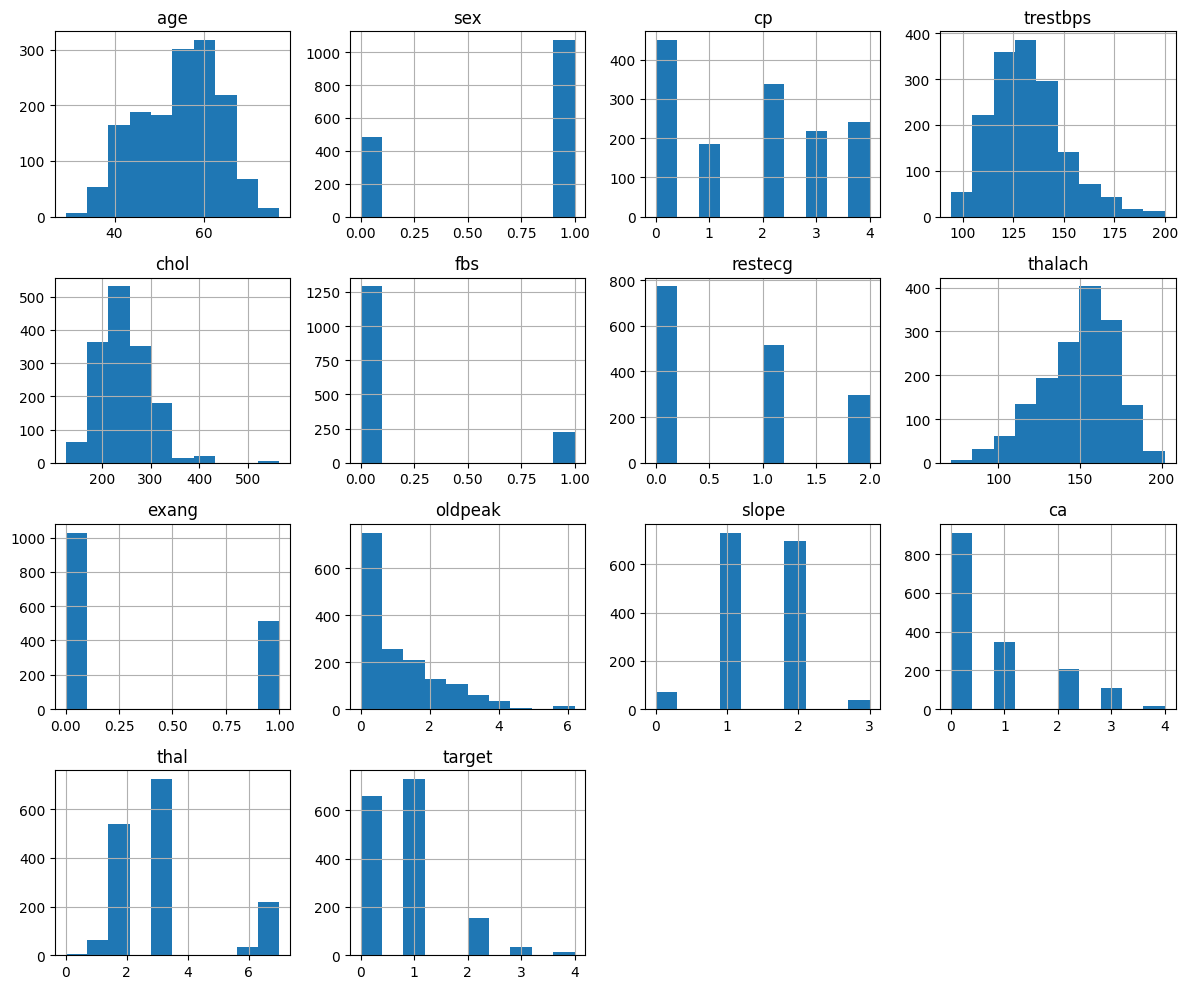

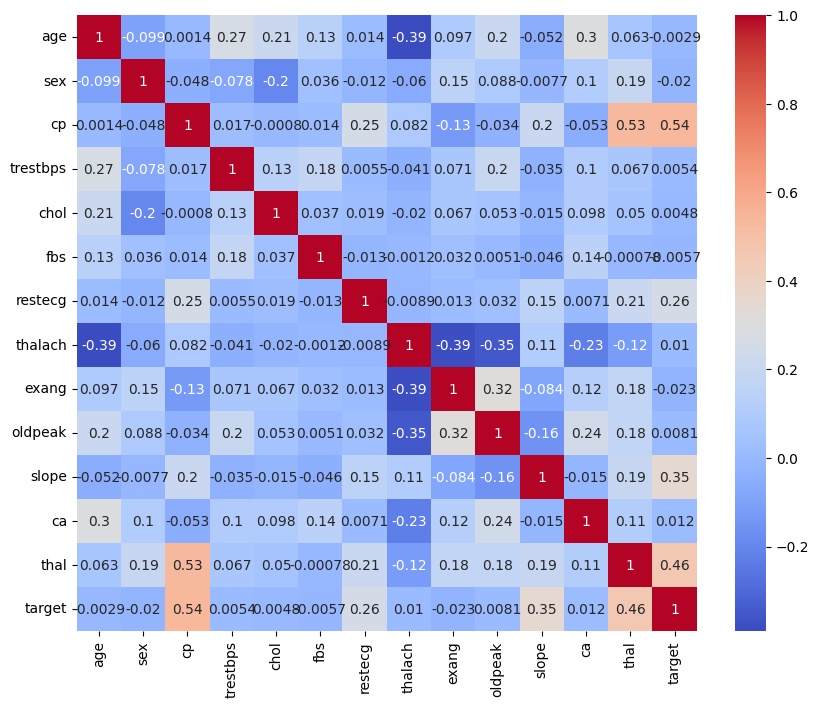

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


# Data cleaning 

In [40]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identifying numerical and categorical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


In [41]:

# Imputers
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')


In [42]:

# Scaling and Encoding
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')


In [43]:

# Applying transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_imputer, numerical_cols),
        ('scale', scaler, numerical_cols),
        ('cat', categorical_imputer, categorical_cols),
        ('ohe', ohe, categorical_cols)
    ])


In [44]:

# Fit the preprocessor
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])


# Scaling numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Correctly initializing OneHotEncoder
encoder = OneHotEncoder()

# Fitting and transforming the categorical columns
encoded_categorical_data = encoder.fit_transform(df[categorical_cols])


In [50]:

# Converting to a dense DataFrame
encoded_categorical_df = pd.DataFrame(encoded_categorical_data.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

encoded_categorical_df.head()


,sex_0.0,sex_1.0,cp_0.0,cp_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_0.0,fbs_1.0,restecg_0.0,...,ca_1.0,ca_2.0,ca_3.0,ca_4.0,thal_0.0,thal_1.0,thal_2.0,thal_3.0,thal_6.0,thal_7.0
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [51]:
# After handling missing values, scaling numerical features, and encoding categorical features,
# the numerical features are already updated in the df DataFrame.

# For demonstration purposes, we'll concatenate the original numerical columns (now cleaned and scaled)
# with the one-hot encoded categorical DataFrame to view the fully preprocessed dataset.

# Concatenating the numerical and encoded categorical dataframes
new_df = pd.concat([df[numerical_cols].reset_index(drop=True), encoded_categorical_df.reset_index(drop=True)], axis=1)

# Display the first few rows of the fully preprocessed (cleaned) DataFrame
new_df.head()


,age,trestbps,chol,thalach,oldpeak,sex_0.0,sex_1.0,cp_0.0,cp_1.0,cp_2.0,...,ca_1.0,ca_2.0,ca_3.0,ca_4.0,thal_0.0,thal_1.0,thal_2.0,thal_3.0,thal_6.0,thal_7.0
0,0.959557,0.762177,-0.263467,0.030423,1.067600,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.411414,1.614195,0.790401,-1.795614,-0.225214,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.411414,-0.657852,-0.343004,-0.882595,1.326162,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.977512,-0.089840,0.074566,1.639074,2.101850,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.525656,-0.089840,-0.840112,0.986918,0.291912,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# **Preparing new_df for modeling**

In [52]:
from sklearn.model_selection import train_test_split

In [53]:

# First, ensuring 'target' is included for completeness
new_df = pd.concat([new_df, df['target'].reset_index(drop=True)], axis=1)


In [54]:

# Separating features and target variable
X = new_df.drop('target', axis=1)
y = new_df['target']


In [55]:

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirming the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1273, 34), (319, 34), (1273,), (319,))

In [56]:
X_test.head()

,age,trestbps,chol,thalach,oldpeak,sex_0.0,sex_1.0,cp_0.0,cp_1.0,cp_2.0,...,ca_1.0,ca_2.0,ca_3.0,ca_4.0,thal_0.0,thal_1.0,thal_2.0,thal_3.0,thal_6.0,thal_7.0
917,0.281772,1.159786,0.551789,-2.665155,-0.225214,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1165,0.168808,-0.657852,-0.124277,0.856487,-0.914714,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1498,-0.396013,0.478172,1.029013,-1.186935,2.705163,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
361,-2.881226,-0.089840,-0.840112,2.291230,-0.914714,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1481,1.298450,2.636616,-0.362889,0.682579,-0.052839,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [57]:
y_train.head()

1545    2
1509    1
744     0
462     0
1356    2
Name: target, dtype: int64

In [80]:
y_train.unique()

array([2, 1, 0, 4, 3])

# **Logistic Regression**

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initializing the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fitting the model on the training data
log_reg.fit(X_train, y_train)

# Predicting on the testing data
y_pred = log_reg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report


/Users/user/Untitled Folder/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/user/Untitled Folder/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/user/Untitled Folder/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

(0.6959247648902821,
 array([[100,  39,   1,   0,   0],
        [ 27, 106,  10,   0,   0],
        [  6,   4,  16,   2,   0],
        [  1,   0,   5,   0,   0],
        [  0,   0,   2,   0,   0]]),
 '              precision    recall  f1-score   support\n\n           0       0.75      0.71      0.73       140\n           1       0.71      0.74      0.73       143\n           2       0.47      0.57      0.52        28\n           3       0.00      0.00      0.00         6\n           4       0.00      0.00      0.00         2\n\n    accuracy                           0.70       319\n   macro avg       0.39      0.41      0.39       319\nweighted avg       0.69      0.70      0.69       319\n')

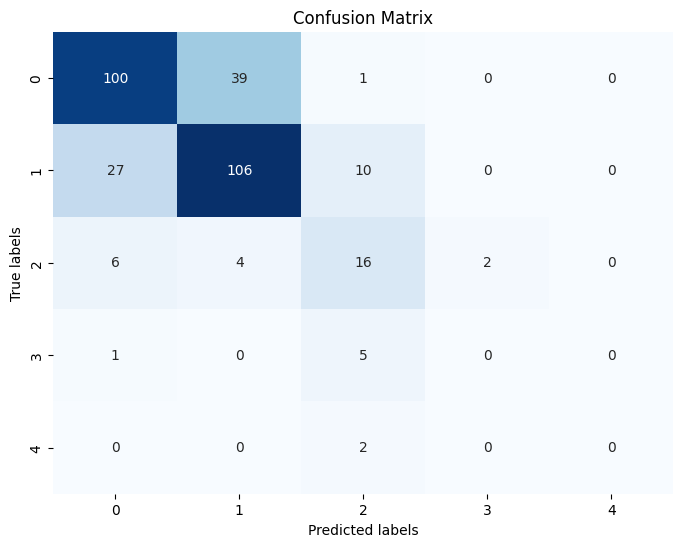

In [59]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# **SVC and LinearSVC**

In [78]:
from sklearn.svm import SVC, LinearSVC

# Initializing the Support Vector Machine models
svm_clf = SVC(kernel='rbf', random_state=42)
linear_svc_clf = LinearSVC(max_iter=10000, random_state=42)

# Fitting the SVM model
svm_clf.fit(X_train, y_train)
# Predicting on the testing data with SVM
y_pred_svm = svm_clf.predict(X_test)

# Fitting the LinearSVC model
linear_svc_clf.fit(X_train, y_train)
# Predicting on the testing data with LinearSVC
y_pred_linear_svc = linear_svc_clf.predict(X_test)

# Evaluating the models
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_linear_svc = accuracy_score(y_test, y_pred_linear_svc)
svc_conf_matrix = confusion_matrix(y_test, y_pred_linear_svc)

accuracy_svm, accuracy_linear_svc


(0.7366771159874608, 0.7053291536050157)

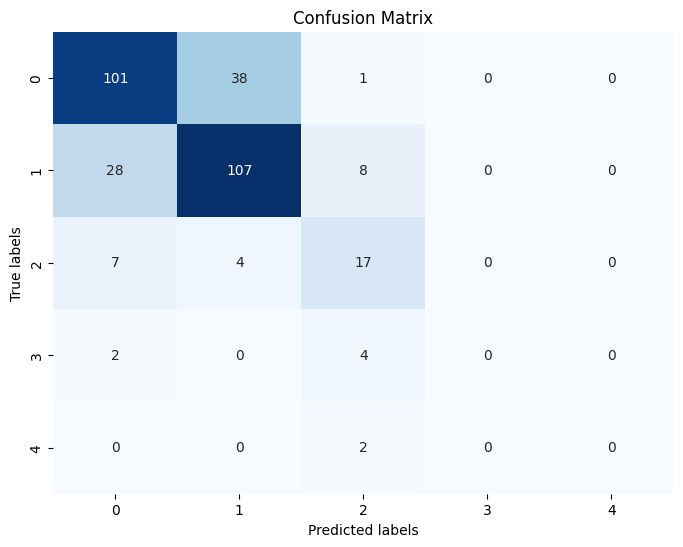

In [79]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svc_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# **KNeighborsClassifier**

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN model
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_clf.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_clf.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
print(f"KNN Model Accuracy: {accuracy_knn:.4f}")


KNN Model Accuracy: 0.6991


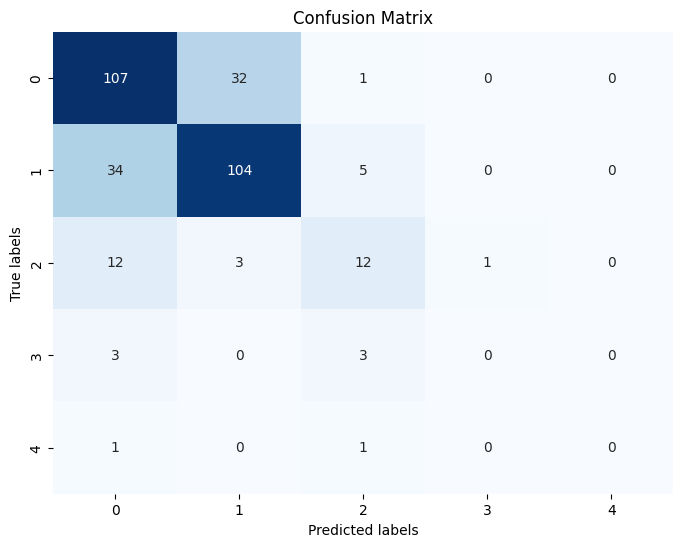

In [63]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# **SGDClassifier**

In [64]:
from sklearn.linear_model import SGDClassifier

# Initializing the Stochastic Gradient Descent Classifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

# Fitting the model on the training data
sgd_clf.fit(X_train, y_train)

# Predicting on the testing data with SGD
y_pred_sgd = sgd_clf.predict(X_test)

# Evaluating the SGD model
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
sgd_conf_matrix = confusion_matrix(y_test, y_pred_sgd)

accuracy_sgd


0.6833855799373041

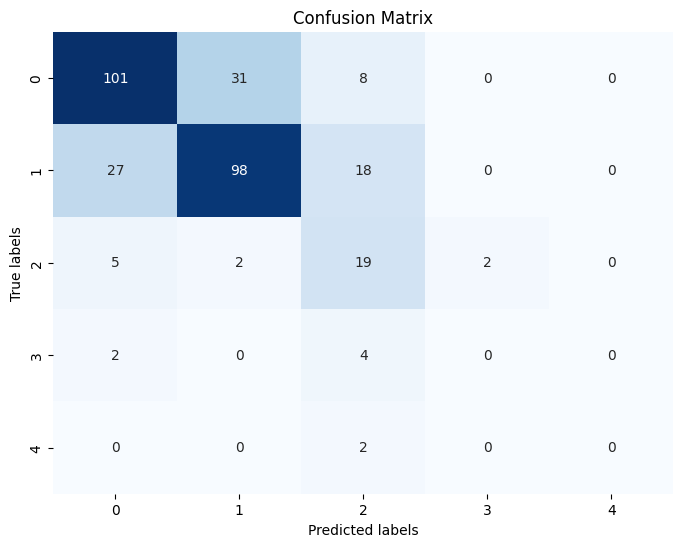

In [65]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(sgd_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# **GradientBoostingClassifier**

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

# Initializing the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fitting the model on the training data
gb_clf.fit(X_train, y_train)

# Predicting on the testing data with Gradient Boosting
y_pred_gb = gb_clf.predict(X_test)

# Evaluating the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
gb_conf_matrix = confusion_matrix(y_test, y_pred_gb)

accuracy_gb


0.6990595611285266

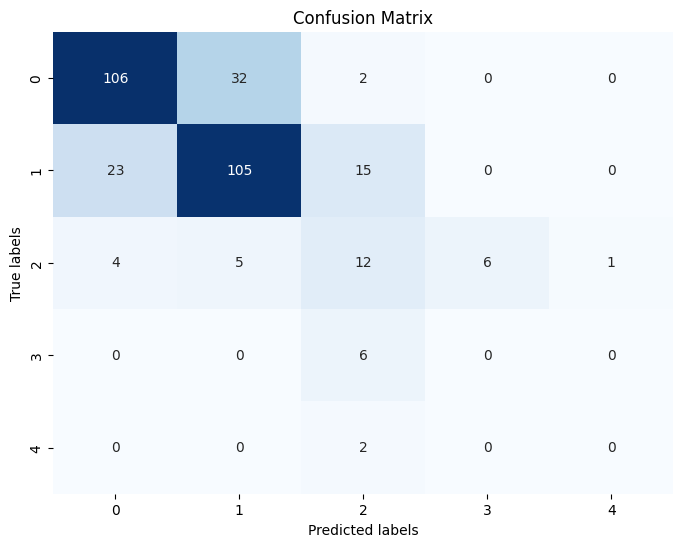

In [71]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(gb_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# **DecisionTreeClassifier**

In [72]:
from sklearn.tree import DecisionTreeClassifier

# Initializing the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Fitting the model on the training data
dt_clf.fit(X_train, y_train)

# Predicting on the testing data with Decision Tree
y_pred_dt = dt_clf.predict(X_test)

# Evaluating the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)
accuracy_dt


0.7398119122257053

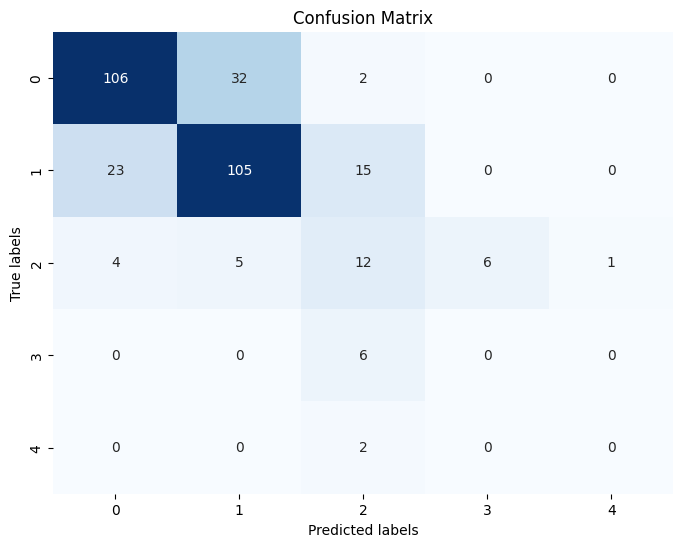

In [73]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(gb_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# **RandomForestClassifier**

In [74]:
from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model on the training data
rf_clf.fit(X_train, y_train)

# Predicting on the testing data with Random Forest
y_pred_rf = rf_clf.predict(X_test)

# Evaluating the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
accuracy_rf


0.7178683385579937

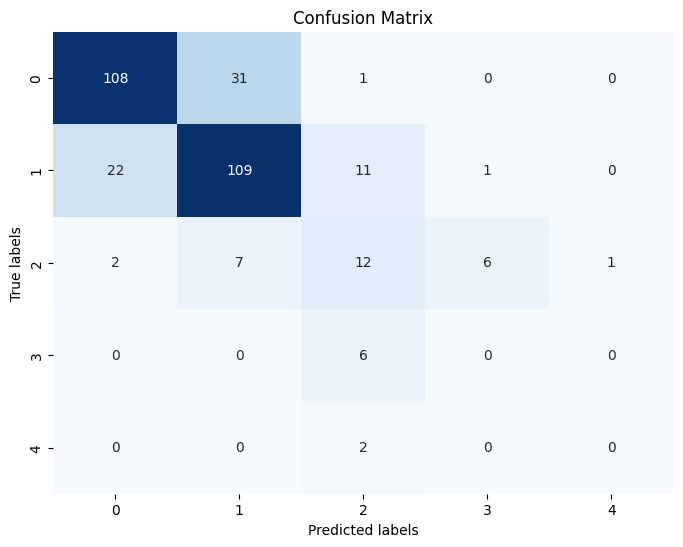

In [75]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# **XGBClassifier**

In [76]:
from xgboost import XGBClassifier

# Initializing the XGB Classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fitting the model on the training data
xgb_clf.fit(X_train, y_train)

# Predicting on the testing data with XGB Classifier
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluating the XGB Classifier model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)
accuracy_xgb


0.7115987460815048

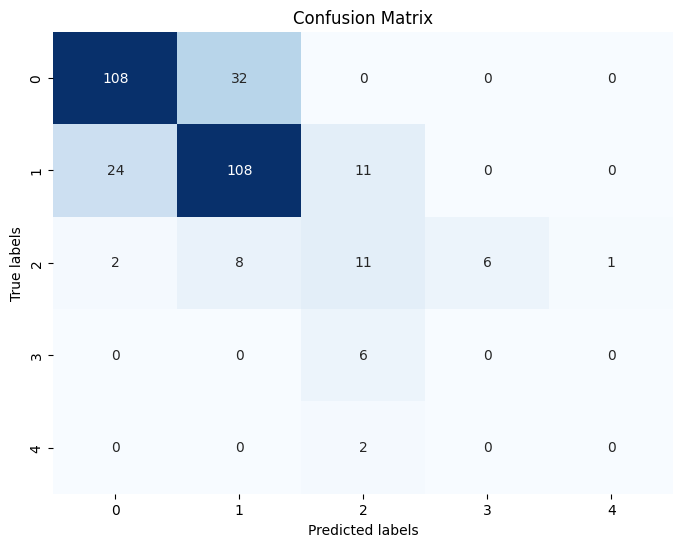

In [77]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# **Neural Networks**

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define a basic neural network model
def build_basic_model(input_shape):
    model = Sequential([
        Dense(32, activation='relu', input_shape=(input_shape,)),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Building and training the basic model
basic_model = build_basic_model(X_train.shape[1])
history_basic = basic_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=0)

# Evaluating the basic model
basic_model.evaluate(X_test, y_test)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6128 - loss: -28563.8828


[-19613.0, 0.6363636255264282]

In [36]:
# Define a deeper neural network model
def build_deeper_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Building and training the deeper model
deeper_model = build_deeper_model(X_train.shape[1])
history_deeper = deeper_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=20, verbose=0)

# Evaluating the deeper model
deeper_model.evaluate(X_test, y_test)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5352 - loss: -4823456768.0000


[-3372655104.0, 0.5297805666923523]

# **Saving the models**

In [41]:
import joblib
import os

In [42]:
drive_path = '/content/drive/My Drive/CVD_Model/'
os.makedirs(drive_path, exist_ok=True)



In [43]:
# Ensuring the directory exists
os.makedirs(drive_path, exist_ok=True)

# Reattempt saving the models to Google Drive
for name, model in zip(model_names, models):
    joblib.dump(model, f'{drive_path}{name}.joblib')

print("Models saved to Google Drive successfully.")

Models saved to Google Drive successfully.
